# Image Basics processing with Pillow and OpenCV
## In this notebook, we'll learn about image types, basic image operations, watermarking, and image quality metrics such as MSE and PSNR.   
## We will use two popular Python libraries: **Pillow** and **OpenCV**.


### Compare opencv & pillow

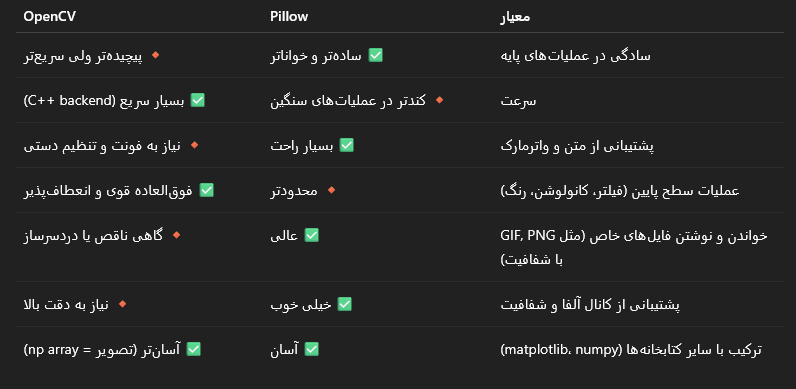

### Installing Required Libraries

In [ ]:
!pip install pillow opencv-python

### Import Libraries

In [ ]:
from PIL import Image, ImageDraw
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

### Image Types
There are different types of images based on color channels:
- **RGB**: Color image with Red, Green, Blue channels.
- **Grayscale**: Single-channel image with shades of gray.
- **Black and White (Binary)**: Each pixel is either 0 (black) or 255 (white).


### Create Basic Images

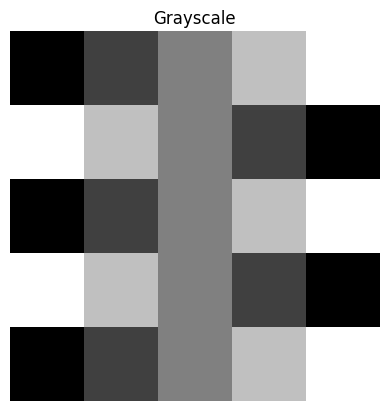

In [ ]:
# Create a simple grayscale image
gray_matrix = np.array([
    [0, 64, 128, 192, 255],
    [255, 192, 128, 64, 0],
    [0, 64, 128, 192, 255],
    [255, 192, 128, 64, 0],
    [0, 64, 128, 192, 255]
], dtype=np.uint8)

plt.imshow(gray_matrix, cmap='gray')
plt.title('Grayscale')
plt.axis('off')
plt.show()

(5, 5, 3)


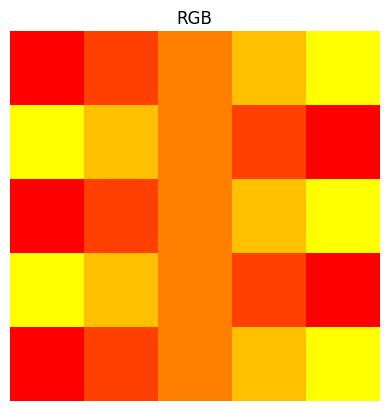

In [ ]:
# Create an RGB image
red = np.full((5, 5), 255, dtype=np.uint8)
blue = np.zeros((5, 5), dtype=np.uint8)
green = np.array([
    [0, 64, 128, 192, 255],
    [255, 192, 128, 64, 0],
    [0, 64, 128, 192, 255],
    [255, 192, 128, 64, 0],
    [0, 64, 128, 192, 255]
], dtype=np.uint8)

# Stack into one RGB image
rgb_image = np.stack([red, green, blue], axis=2)
print(rgb_image.shape)

plt.imshow(rgb_image)
plt.title('RGB')
plt.axis('off')
plt.show()

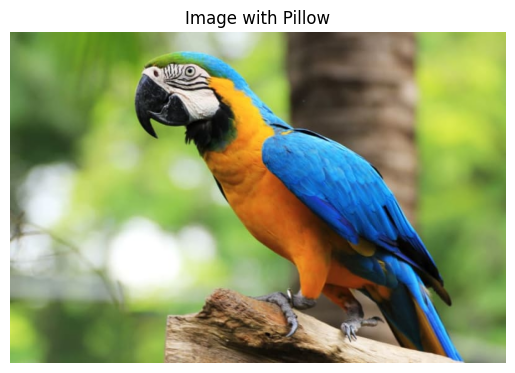

In [ ]:
img_path = '/content/parrot.jpg'
img_rgb = Image.open(img_path)

plt.imshow(img_rgb)
plt.axis('off')
plt.title('Image with Pillow')
plt.show()

### Convert to Grayscale and Binary with Pillow

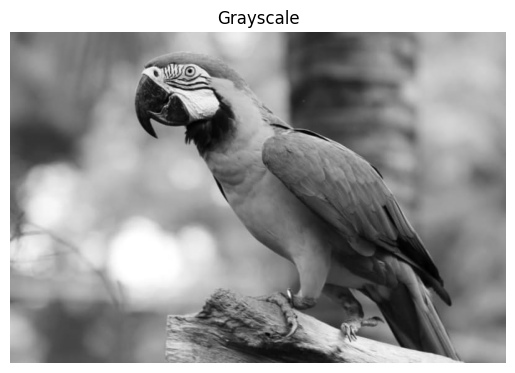

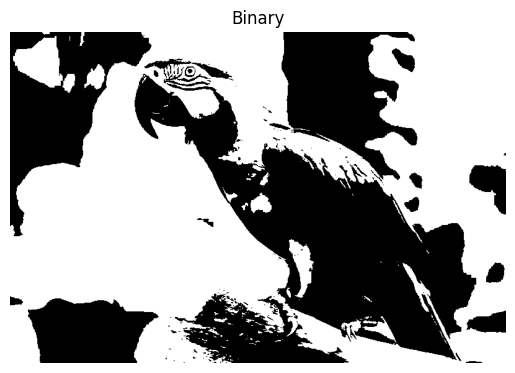

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [ ]:
# Convert to grayscale
img_gray = img_rgb.convert('L')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale')
plt.show()

# Convert to binary (Black & White) with threshold
img_bw2 = img_gray.point(lambda x: 1 if x > 128 else 0, '1')
plt.imshow(img_bw2, cmap='gray')
plt.axis('off')
plt.title('Binary')
plt.show()

print(np.array(img_bw2))

###  Load and Display Image with OpenCV

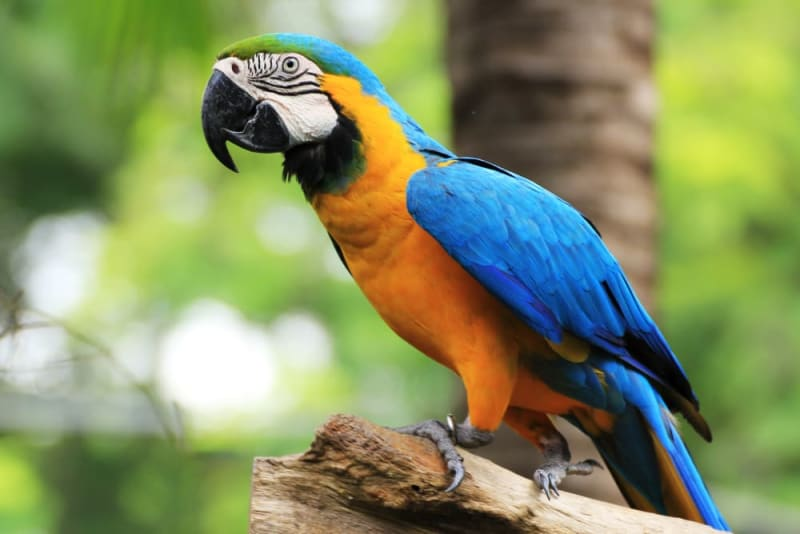

In [ ]:
# Load image using OpenCV
img_cv = cv2.imread("/content/parrot.jpg")
cv2_imshow(img_cv)

### Basic Operations (Resize, Crop, Rotate) with Pillow

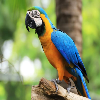

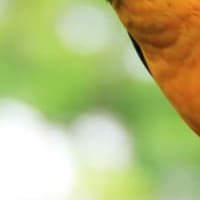

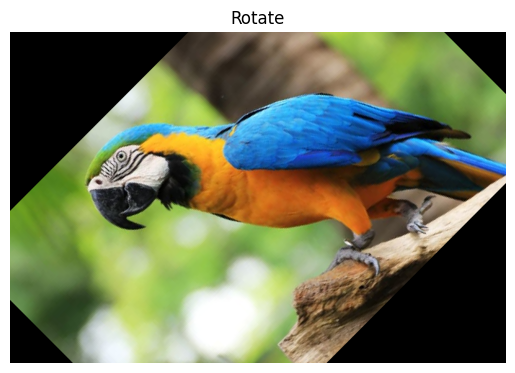

In [ ]:
# Resize
resized = cv2.resize(img_cv, (100, 100))
cv2_imshow(resized)

# crop
cropped = img_cv[200:400, 200:400]
cv2_imshow(cropped)

# Rotate (around center)
rotated = img_rgb.rotate(45)
plt.imshow(rotated)
plt.axis('off')
plt.title('Rotate')
plt.show()

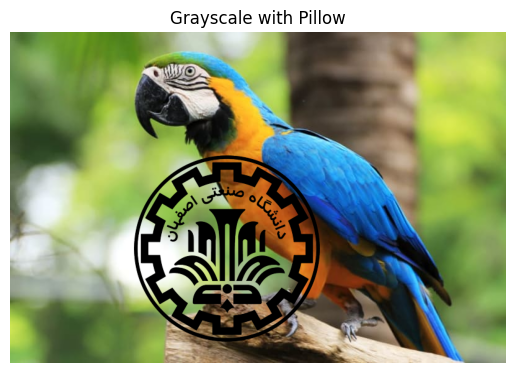

In [ ]:
# Load main image and watermark image
main_img = Image.open('/content/parrot.jpg').convert("RGBA")
watermark = Image.open('/content/logo.png').convert("RGBA")

# Resize watermark
watermark = watermark.resize((300, 300))

# Create transparent layer same size as main image
layer = Image.new("RGBA", main_img.size, (0,0,0,0))

# Paste watermark at desired position (e.g., bottom-right corner)
position = (200, 200)
layer.paste(watermark, position, mask=watermark)

# Composite images together
final_image = Image.alpha_composite(main_img, layer)

# Show result
plt.imshow(final_image)
plt.axis('off')
plt.title('Grayscale with Pillow')
plt.show()


### What is Noise in Images?

When we capture or transmit images, they often get affected by **noise** – unwanted random variations in brightness or color.

Common types of noise include:

- **Gaussian noise**: Caused by sensor or electronics.
- **Salt & Pepper noise**: Looks like random white and black pixels (like salt grains and pepper spots).
- **Speckle noise**: Common in radar/medical images.


In [ ]:
def salt_and_pepper_noise(img, amount=0.05):
    noisy = img.copy()
    num_pixels = int(amount * img.size)
    mask = np.zeros(img.shape, dtype=bool)

    while np.count_nonzero(mask) < num_pixels:
        x = np.random.randint(0, img.shape[0])
        y = np.random.randint(0, img.shape[1])
        if not mask[x, y]:
            mask[x, y] = True
            noisy[x, y] = 255 if np.random.rand() < 0.5 else 0
    return noisy


### Image Quality Metrics in Image Processing

These metrics are commonly used to evaluate the quality of images, especially when comparing original vs. distorted or restored versions.

---
### 1. MAE — Mean Absolute Error

**Definition:**  
Average of absolute differences between original and distorted images.  
 *Lower is better.*

**Formula:**

$$
\text{MAE} = \frac{1}{mn} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} \left| O(i,j) - K(i,j) \right|
$$

### 2. MSE — Mean Squared Error

Measures the average squared difference between corresponding pixels of two images.  
 *Lower is better.*

**Formula:**

$$
\text{MSE} = \frac{1}{mn} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} \left[ O(i,j) - K(i,j) \right]^2
$$

Where:
- \( O \): Original image
- \( K \): Compared image (e.g., noisy or compressed)
- \( m \times n \): Image dimensions

---

### 2. PSNR — Peak Signal-to-Noise Ratio

Based on MSE, it gives a logarithmic measure of image similarity in decibels (dB).  
*Higher is better.*

**Formula:**

$$
\text{PSNR} = 20 \cdot \log_{10} \left( \frac{\text{MAX}_I}{\sqrt{\text{MSE}}} \right)
$$

Where:
- \( MAXI \): Maximum possible pixel value (e.g., 255 for 8-bit images)


In [ ]:
def mse(img1, img2):
    return np.mean((img1 - img2) ** 2)

def psnr(img1, img2):
    mse_val = mse(img1, img2)
    if mse_val == 0:
        return float('inf')
    return 20 * np.log10(255 / np.sqrt(mse_val))


PSNR (Salt & Pepper): 28.83134626163401 dB


Text(0.5, 1.0, 'Salt & Pepper')

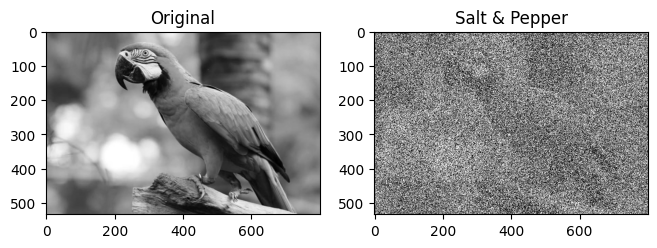

In [ ]:
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)

# Add different types of noise
sp_noise = salt_and_pepper_noise(gray, amount=0.8)

# Calculate PSNRs
print("PSNR (Salt & Pepper):", psnr(gray, sp_noise), "dB")

# Show images
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(sp_noise, cmap='gray')
plt.title('Salt & Pepper')